In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from random import sample
import plotly.figure_factory as ff
import statsmodels.api as sm
import plotly.graph_objects as go
import random 

1) Analisi esplorativa

2) Distribuzioni e campionamenti 

3) Test statistici e significatività

### **Capitolo 1: analisi esplorativa dei dati**

***Numeric***:
Data that are expressed on a numeric scale.
- Continuous:
Data that can take on any value in an interval. (Synonyms: interval, float,
numeric)
- Discrete:
Data that can take on only integer values, such as counts. (Synonyms: integer,
count)

***Categorical***:
Data that can take on only a specific set of values representing a set of possible
categories. (Synonyms: enums, enumerated, factors, nominal)
- Binary:
A special case of categorical data with just two categories of values, e.g., 0/1,
true/false. (Synonyms: dichotomous, logical, indicator, boolean)
- Ordinal:
Categorical data that has an explicit ordering. (Synonym: ordered factor)

The typical frame of reference for an analysis in data science is a 
**rectangular data**
object, like a spreadsheet or database table.
Rectangular data is the general term for a two-dimensional matrix with rows indicating
records (cases) and columns indicating features (variables); data frame is the specific
format in R and Python.

**Feature:**
A column within a table is commonly referred to as a feature.



**Records:**
A row within a table is commonly referred to as a record.

---
---
**Locazione**

In [2]:
state = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


**Media**: The mean is the
sum of all values divided by the number of values.
The basic metric for location is the mean, but it can be sensitive to extreme
values (outlier).

In [3]:
np.mean(state[['Population']])

Population    6162876.3
dtype: float64

**Media trimmerata**: A variation of the mean is a trimmed mean, which you calculate by dropping a fixed
number of sorted values at each end and then taking an average of the remaining values. **A trimmed mean eliminates the influence of extreme values**

In [4]:
stats.trim_mean(state[['Population']], 0.1)

array([4783697.125])

**Media pesata**: Another type of mean is a weighted mean, which you calculate by multiplying each
data value xi by a user-specified weight wi and dividing their sum by the sum of the
weights.

There are two main motivations for using a weighted mean:
- **Some values are intrinsically more variable than others**, and highly variable
observations are given a lower weight. For example, if we are taking the average
from multiple sensors and one of the sensors is less accurate, then we might
downweight the data from that sensor.
- **The data collected does not equally represent the different groups that we are
interested in measuring**. For example, because of the way an online experiment
was conducted, we may not have a set of data that accurately reflects all groups in
the user base. To correct that, we can give a higher weight to the values from the
groups that were underrepresented.

In [5]:
np.average(state[['Murder.Rate']],weights=state[['Population']])

4.445833981123393

**Mediana**: The median is the middle number on a sorted list of the data. If there is an even number
of data values, the middle value is one that is not actually in the data set, but
rather the average of the two values that divide the sorted data into upper and lower
halves. Compared to the mean, which uses all observations, the median depends only
on the values in the center of the sorted data. While this might seem to be a disadvantage,
**since the mean is much more sensitive to the data, there are many instances in
which the median is a better metric for location**. Let’s say we want to look at typical
household incomes in neighborhoods around Lake Washington in Seattle. In comparing
the Medina neighborhood to the Windermere neighborhood, using the mean
would produce very different results because Bill Gates lives in Medina. If we use the
median, it won’t matter how rich Bill Gates is—the position of the middle observation
will remain the same.

In [6]:
np.median(state[['Population']])

4436369.5

**Outliers**: The median is referred to as a robust estimate of location since it is not influenced by
outliers (extreme cases) that could skew the results. An outlier is any value that is very
distant from the other values in a data set.When outliers are the
result of bad data, the mean will result in a poor estimate of location, while the
median will still be valid. In any case, outliers should be identified and are usually
worthy of further investigation.

---
---
**Stima della variabilità**

Location is just one dimension in summarizing a feature. A second dimension, variability,
also referred to as dispersion, measures whether the data values are tightly clustered
or spread out.

- **Deviations**
The difference between the observed values and the estimate of location.
Synonyms
errors, residuals

- **Variance**
The sum of squared deviations from the mean divided by n – 1 where n is the
number of data values.

- **Standard deviation**
The square root of the variance.

- **Mean absolute deviation**
The mean of the absolute values of the deviations from the mean.
Synonyms
l1-norm, Manhattan norm

- **Median absolute deviation from the median**
The median of the absolute values of the deviations from the median.

- **Range**
The difference between the largest and the smallest value in a data set.

- **Order statistics**
Metrics based on the data values sorted from smallest to biggest.
Synonym
ranks

- **Percentile**
The value such that P percent of the values take on this value or less and (100–P)
percent take on this value or more.
Synonym
quantile

- **Interquartile range**
The difference between the 75th percentile and the 25th percentile.
Synonym
IQR

The most widely used estimates of variation are based on the differences, or deviations,
between the estimate of location and the observed data. These deviations tell us how dispersed the
data is around the central value.

**Varianza**: The variance is an average of the squared
deviations, and the standard deviation is the square root of the variance

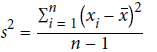

In [7]:
np.var(state[['Population']])

Population    4.596036e+13
dtype: float64

**Deviazione standard**: The standard deviation is much easier to interpret than the variance since it is on the
same scale as the original data

In [8]:
np.std(state[['Population']])

Population    6.779407e+06
dtype: float64

A simple approach is to take the average of the absolute values of the
deviations from the mean


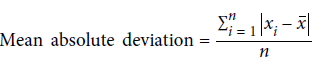

In [9]:
state[['Population']].mad()

Population    4450933.356
dtype: float64

**median absolute deviation from the median**: Neither the variance, the standard deviation, nor the mean absolute deviation is
robust to outliers and extreme values. The variance and standard deviation
are especially sensitive to outliers since they are based on the squared deviations.
A robust estimate of variability is the median absolute deviation from the median or
MAD

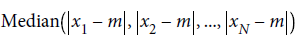

where m is the median

In [10]:
np.median(np.abs(state[['Population']]-np.median(state[['Population']])))

2596702.0

**Estimates Based on Percentiles**

A different approach to estimating dispersion is based on looking at the spread of the
sorted data. Statistics based on sorted (ranked) data are referred to as *order statistics*.
The most basic measure is the range: the difference between the largest and smallest
numbers.

The minimum and maximum values themselves are useful to know and are
helpful in identifying outliers, but the range is extremely sensitive to outliers and not
very useful as a general measure of dispersion in the data.
To avoid the sensitivity to outliers, we can look at the range of the data after dropping
values from each end.

In a data set, the **Pth percentile is a value such that at least P percent
of the values take on this value or less and at least (100 – P) percent of the values**
take on this value or more. For example, to find the 80th percentile, sort the data.
Then, starting with the smallest value, proceed 80 percent of the way to the largest
value.

If we have an even number of data (n is even), then the percentile is
ambiguous under the preceding definition. In fact, we could take
on any value between the order statistics x j and x j + 1 where j
satisfies:

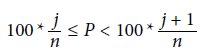



In [11]:
print(np.percentile(state[['Population']], 25))
print(np.percentile(state[['Population']], 40))
print(np.percentile(state[['Population']], 50)) # è anche la mediana
print(np.percentile(state[['Population']], 60))

1833004.25
3014731.8000000003
4436369.5
5457149.399999999


A common measurement of variability is the difference between the 25th percentile
and the 75th percentile, called the **interquartile range (or IQR)**.

In [12]:
np.percentile(state[['Population']], 75) - np.percentile(state[['Population']], 25) # quindi è la distanza tra il 25esimo percentile e il 75esimo

4847308.0

---
---
**Esplorare la distribuzione dei dati (numerici)**

- **Boxplot**
A plot introduced by Tukey as a quick way to visualize the distribution of data.
Synonym
box and whiskers plot

- **Frequency table**
A tally of the count of numeric data values that fall into a set of intervals (bins).

- **Histogram**
A plot of the frequency table with the bins on the x-axis and the count (or proportion)
on the y-axis. While visually similar, bar charts should not be confused
with histograms.

- **Density plot**
A smoothed version of the histogram, often based on a kernel density estimate.

In [13]:
# percentili 

state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

- *Boxplot*: are based on percentiles and give a
quick way to visualize the distribution of data.

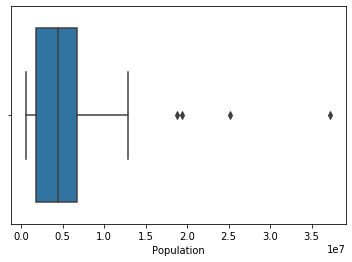

In [14]:
sns.boxplot(x=state['Population'])
plt.show()

- *Frequency Tables and Histograms*: a frequency table of a variable divides up the variable range into equally spaced segments
and tells us how many values fall within each segment. It is important to include the empty bins; the fact that there are no values
in those bins is useful information. It can also be useful to experiment with different
bin sizes

In [15]:
binnedPopulation = pd.cut(state['Population'], 10) # creo 10 classi
binnedPopulation.value_counts() # conto tutti i valori nelle classi

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

A **histogram** is a way to visualize a frequency table, with bins on the x-axis and the
data count on the y-axis.

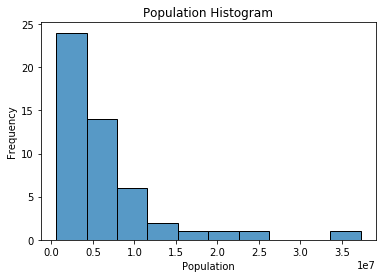

In [16]:
sns.histplot(state['Population'], bins=10, kde=False)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Population Histogram')
plt.show()

- **Density Plots and Estimates**: A density plot can be thought of as a smoothed histogram,
although it is typically computed directly from the data through a kernel density estimate

Text(0.5, 0, 'Murder Rate (per 100,000)')

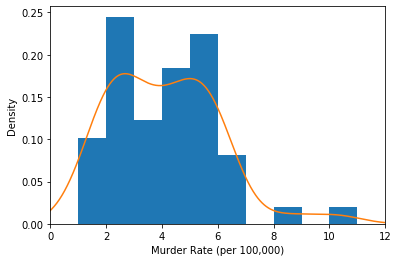

In [17]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

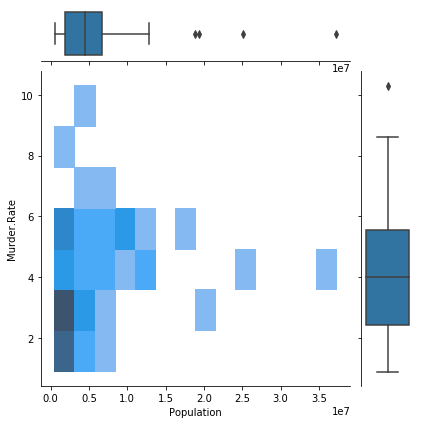

In [18]:
g = sns.JointGrid(data=state, x="Population", y="Murder.Rate")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

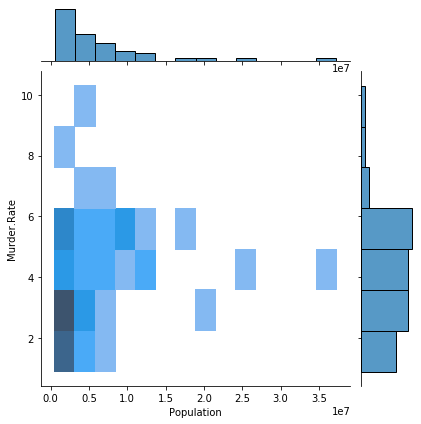

In [19]:
g = sns.JointGrid(data=state, x="Population", y="Murder.Rate")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.histplot)

---
---
**Exploring Binary and Categorical Data**

- **Mode**
The most commonly occurring category or value in a data set.

- **Expected value**
When the categories can be associated with a numeric value, this gives an average
value based on a category’s probability of occurrence.

- **Bar charts**
The frequency or proportion for each category plotted as bars.

- **Pie charts**
The frequency or proportion for each category plotted as wedges in a pie.

In [20]:
dfw = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/dfw_airline.csv')
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


**Bar chart**: Bar charts, seen often in the popular press, are a common visual tool for displaying a
single categorical variable. Categories are listed on the x-axis, and frequencies or proportions
on the y-axis.

In [21]:
dfw_transpose = dfw.transpose().reset_index()
dfw_transpose.rename(columns={'index': 'Cause', 0: 'Count'}, inplace=True)

In [22]:
dfw_transpose

,Cause,Count
0,Carrier,64263.16
1,ATC,84856.50
2,Weather,11235.42
3,Security,343.15
4,Inbound,118427.82


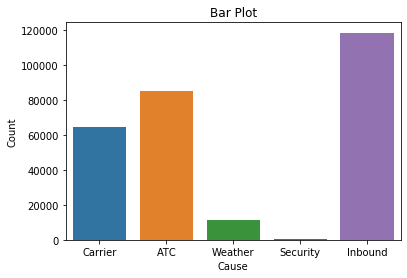

In [24]:
sns.barplot(x='Cause', y='Count', data=dfw_transpose)
plt.xlabel('Cause')
plt.ylabel('Count')
plt.title('Bar Plot')
plt.show()

**Pie chart**: Pie charts are an alternative to bar charts

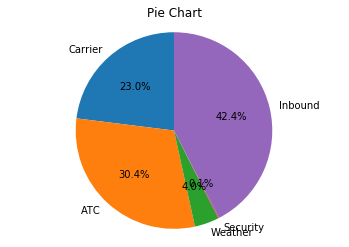

In [25]:
# Assuming 'dfw_transpose' is a DataFrame with 'Cause' and 'Count' columns
plt.pie(dfw_transpose['Count'], labels=dfw_transpose['Cause'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Pie Chart')
plt.show()

**Mode:**The mode is the value—or values in case of a tie—that appears most often in the data. The mode is a simple summary statistic for
categorical data, and it is generally not used for numeric data

In [ ]:
lista = ['a','b','b','d','b']
stats.mode(lista)

ModeResult(mode=array(['b'], dtype='<U1'), count=array([3]))

**Expected value:** A special type of categorical data is data in which the categories represent or can be
mapped to discrete values on the same scale

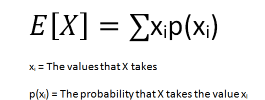

A marketer for a new cloud technology,
for example, offers two levels of service, one priced at $300/month and another at
$50/month. The marketer offers free webinars to generate leads, and the firm figures
that 5% of the attendees will sign up for the $300 service, 15% will sign up for the $50
service, and 80% will not sign up for anything. This data can be summed up, for
financial purposes, in a single “expected value,” which is a form of weighted mean, in
which the weights are probabilities.

image.png

---
---
### **Correlation:** 

Variables X and Y (each with measured data) are said to be positively
correlated if high values of X go with high values of Y, and low values of X go
with low values of Y. If high values of X go with low values of Y, and vice versa, the
variables are negatively correlated.

In [ ]:
sp500_px = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/dfw_airline.csv')
sp500_px.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


- **Correlation coefficient:** a metric that measures the extent to which numeric variables are associated with
one another (ranges from –1 to +1). For example the "Pearson’s correlation coefficient"

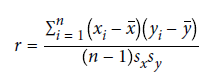

The correlation coefficient is a standardized metric, so that it always ranges from
–1 (perfect negative correlation) to +1 (perfect positive correlation).

A correlation coefficient of zero indicates no correlation, but be aware that random
arrangements of data will produce both positive and negative values for the
correlation coefficient just by chance.



- **Correlation matrix**
A table where the variables are shown on both rows and columns, and the cell
values are the correlations between the variables.

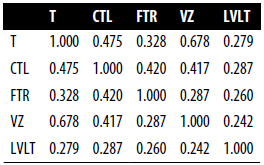

- **Scatterplot**
A plot in which the x-axis is the value of one variable, and the y-axis the value of
another.

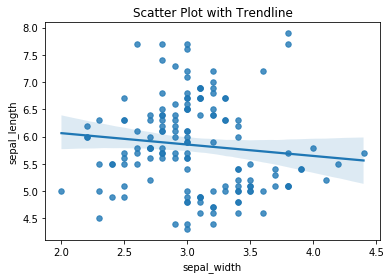

In [27]:
sns.regplot(x='sepal_width', y='sepal_length', data=df, scatter_kws={'s': 30})
plt.title('Scatter Plot with Trendline')
plt.show()

---
---
**Exploring Two or More Variables: multivariate analysis**

Like univariate analysis, bivariate analysis involves both computing summary statistics
and producing visual displays.


**Hexagonal Binning and Contours**

For data sets with hundreds
of thousands or millions of records, a scatterplot will be too dense, so we need a
different way to visualize the relationship

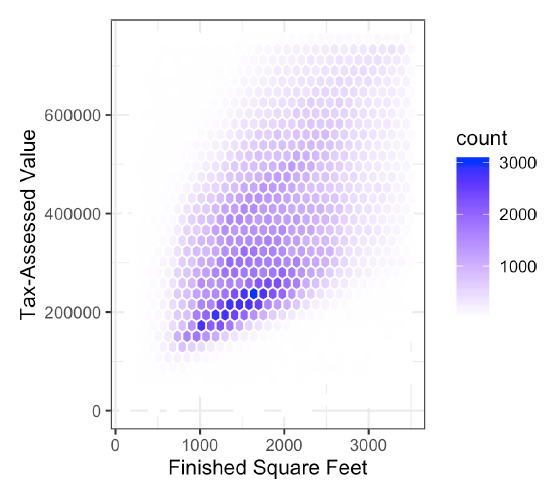

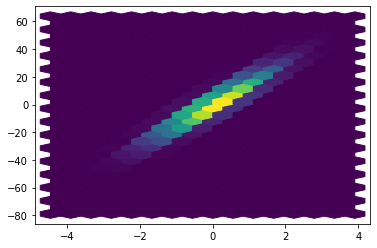

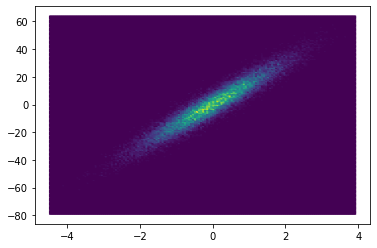

In [ ]:
 
# create data
x = np.random.normal(size=50000)
y = (x * 3 + np.random.normal(size=50000)) * 5
 
# Make the plot
plt.hexbin(x, y, gridsize=(15,15) )
plt.show()
 
# We can control the size of the bins:
plt.hexbin(x, y, gridsize=(150,150) )
plt.show()

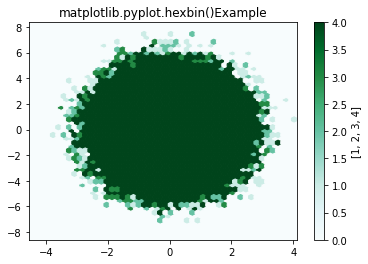

In [ ]:
np.random.seed(19680801) 
    
n = 100000
x = np.random.standard_normal(n) 
y = 2 * np.random.standard_normal(n) 
z =[1, 2, 3, 4] 
xmin = x.min() 
xmax = x.max() 
ymin = y.min() 
ymax = y.max() 
    
hb = plt.hexbin(x, y, gridsize = 50, 
               bins = z, cmap ='BuGn') 
    
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
    
cb = plt.colorbar(hb) 
cb.set_label(z)
plt.title('matplotlib.pyplot.hexbin()\
Example')
  
plt.show()

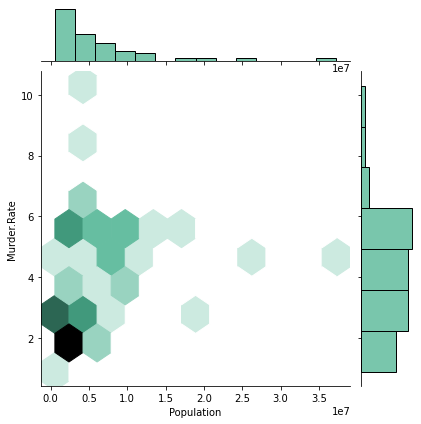

In [ ]:
sns.jointplot(data = state, x="Population", y="Murder.Rate", kind="hex", color="#4CB391")

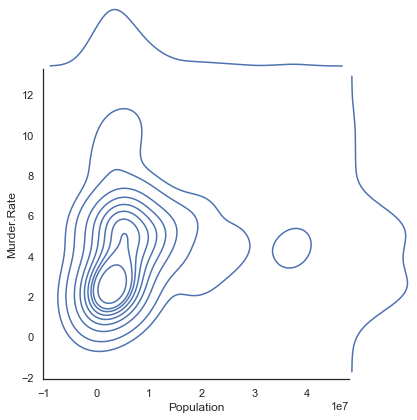

In [29]:
# Assuming 'state' is a DataFrame with 'Population' and 'Murder.Rate' columns
sns.set(style="white", color_codes=True)
g = sns.jointplot(x="Population", y="Murder.Rate", data=state, kind="kde", space=0, color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

# Add histograms manually with specified bins
plt.hist(state["Population"], bins=10, alpha=0.5, color='b', density=True, orientation='vertical')
g.ax_marg_x.set_axis_off()

plt.hist(state["Murder.Rate"], bins=10, alpha=0.5, color='b', density=True, orientation='horizontal')
g.ax_marg_y.set_axis_off()

plt.show()

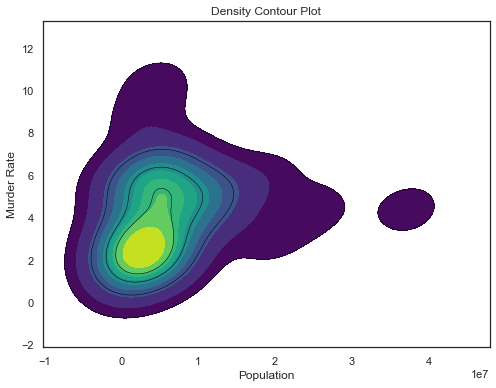

In [31]:
# Assuming 'state' is a DataFrame with 'Population' and 'Murder.Rate' columns
sns.set(style="white")
plt.figure(figsize=(8, 6))

# Create a filled contour plot
sns.kdeplot(x="Population", y="Murder.Rate", data=state, fill=True, cmap="viridis")

# Add contour labels
sns.kdeplot(x="Population", y="Murder.Rate", data=state, levels=5, colors="black", linewidths=0.5)

plt.xlabel("Population")
plt.ylabel("Murder Rate")
plt.title("Density Contour Plot")
plt.show()

**Two Categorical Variables**: 

A useful way to summarize two categorical variables is a **contingency table**—a table of
counts by category

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/lc_loans.csv')
data.head(10)

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
5,Fully Paid,A
6,Current,C
7,Fully Paid,E
8,Charged Off,F
9,Charged Off,B


In [ ]:
data_crosstab = pd.crosstab(data['grade'], data['status'], margins = False)
data_crosstab 

status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,1562,50051,20408,469
B,5302,93852,31160,2056
C,6023,88928,23147,2777
D,5007,53281,13681,2308
E,2842,24639,5949,1374
F,1526,8444,2328,606
G,409,1990,643,199


**Categorical and Numeric Data:**

Boxplots are a simple way to visually
compare the distributions of a numeric variable grouped according to a categorical
variable.

In [33]:
airline = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/airline_stats.csv')
airline.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


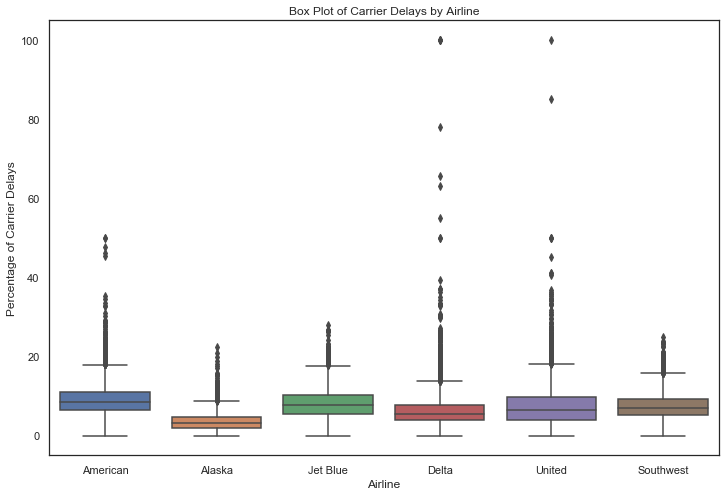

In [34]:
plt.figure(figsize=(12, 8))

# Create a box plot
sns.boxplot(x='airline', y='pct_carrier_delay', data=airline)

plt.xlabel('Airline')
plt.ylabel('Percentage of Carrier Delays')
plt.title('Box Plot of Carrier Delays by Airline')
plt.show()

**Violin plot:**

is an enhancement to the boxplot
and plots the density estimate with the density on the y-axis. The density is mirrored
and flipped over, and the resulting shape is filled in, creating an image resembling a
violin. The advantage of a violin plot is that it can show nuances in the distribution
that aren’t perceptible in a boxplot. On the other hand, the boxplot more clearly
shows the outliers in the data.

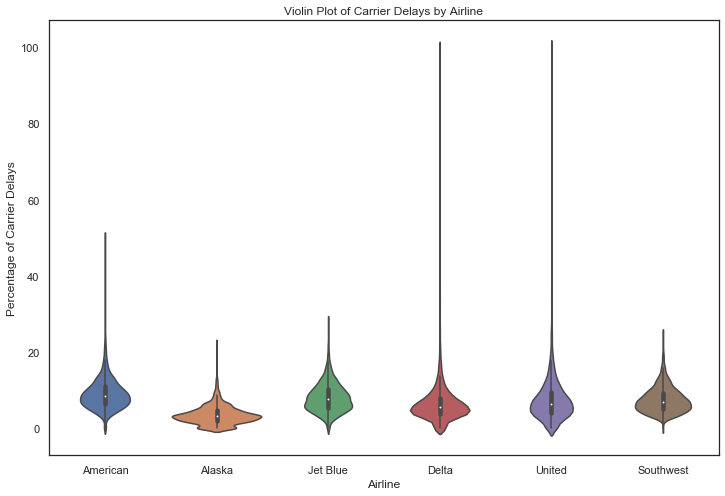

In [36]:
plt.figure(figsize=(12, 8))

# Create a violin plot
sns.violinplot(x='airline', y='pct_carrier_delay', data=airline)

plt.xlabel('Airline')
plt.ylabel('Percentage of Carrier Delays')
plt.title('Violin Plot of Carrier Delays by Airline')
plt.show()

## **Visualizing Multiple Variables:**

In [40]:
kc_tax = pd.read_csv('kc_tax.csv')
kc_tax.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 10, saw 3


In [39]:
kc_tax_1 = kc_tax.iloc[1:30,:]

NameError: name 'kc_tax' is not defined

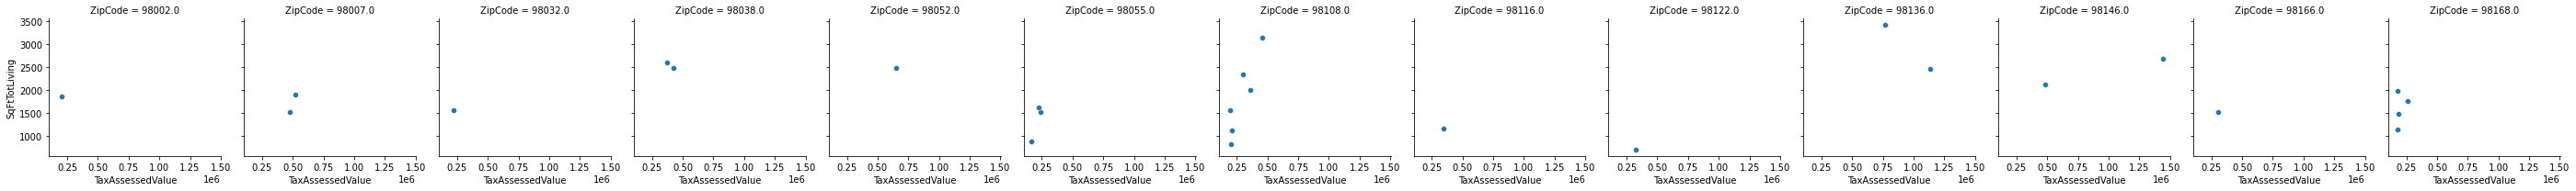

In [ ]:
g = sns.FacetGrid(kc_tax_1 , col="ZipCode")
g.map(sns.scatterplot, "TaxAssessedValue", "SqFtTotLiving")


---
---
# **2. Data and Sampling Distributions**

In general, data scientists need not worry about the theoretical nature of the lefthand
side and instead should focus on the sampling procedures and the data at hand.
There are some notable exceptions. Sometimes data is generated from a physical process
that can be modeled. The simplest example is flipping a coin: this follows a binomial
distribution. Any real-life binomial situation (buy or don’t buy, fraud or no
fraud, click or don’t click) can be modeled effectively by a coin (with modified probability
of landing heads, of course). In these cases, we can gain additional insight by
using our understanding of the population.

## **Random Sampling and Sample Bias:**
A sample is a subset of data from a larger data set; statisticians call this larger data set
the population. A population in statistics is not the same thing as in biology—it is a
large, defined (but sometimes theoretical or imaginary) set of data.
Random sampling is a process in which each available member of the population
being sampled has an equal chance of being chosen for the sample at each draw. The
sample that results is called a simple random sample. Sampling can be done with
replacement, in which observations are put back in the population after each draw for
possible future reselection. Or it can be done without replacement, in which case
observations, once selected, are unavailable for future draws.
Data quality often matters more than data quantity when making an estimate or a
model based on a sample. Data quality in data science involves completeness, consistency
of format, cleanliness, and accuracy of individual data points. Statistics adds the
notion of representativeness.

- **Sample:**
A subset from a larger data set.

- **Population:**
The larger data set or idea of a data set.

- **N (n)**:
The size of the population (sample).

- **Random sampling:**
Drawing elements into a sample at random.

- **Stratified sampling**
Dividing the population into strata and randomly sampling from each strata.

- **Stratum (pl., strata)**
A homogeneous subgroup of a population with common characteristics.

- **Simple random sample**
The sample that results from random sampling without stratifying the
population.

- **Bias**
Systematic error.

- **Sample bias**
A sample that misrepresents the population.

**Bias:** 

Statistical bias refers to measurement or sampling errors that are systematic and produced
by the measurement or sampling process. An important distinction should be
made between errors due to random chance and errors due to bias. Consider the
physical process of a gun shooting at a target. It will not hit the absolute center of the
target every time, or even much at all. An unbiased process will produce error, but it
is random and does not tend strongly in any direction. 
Bias comes in different forms, and may be observable or invisible. When a result does
suggest bias, it is often an indicator
that a statistical or machine learning model has been misspecified, or an important
variable left out.

**Selection Bias**

Selection bias refers to the practice of selectively choosing data—consciously or
unconsciously—in a way that leads to a conclusion that is misleading or ephemeral.

- **Selection bias**
Bias resulting from the way in which observations are selected.

- **Data snooping** Extensive hunting through data in search of something interesting.

- **Vast search effect**
Bias or nonreproducibility resulting from repeated data modeling, or modeling
data with large numbers of predictor variables.

**Specifying a hypothesis and then collecting data following randomization and
random sampling principles ensures against bias.**

## **Sampling Distribution of a Statistic**

The term sampling distribution of a statistic refers to the distribution of some sample
statistic over many samples drawn from the same population. Much of classical statistics
is concerned with making inferences from (small) samples to (very large) populations.

- **Sample statistic**
A metric calculated for a sample of data drawn from a larger population.

- **Data distribution**
The frequency distribution of individual values in a data set.

- **Sampling distribution**
The frequency distribution of a sample statistic over many samples or resamples.

- **Central limit theorem**
The tendency of the sampling distribution to take on a normal shape as sample
size rises.

- **Standard error**
The variability (standard deviation) of a sample statistic over many samples (not
to be confused with standard deviation, which by itself, refers to variability of
individual data values).

In the era of big data, it is sometimes surprising that smaller is better. Time and effort
spent on random sampling not only reduces bias but also allows greater attention to
data exploration and data quality.

- Even in the era of big data, random sampling remains an important arrow in the
data scientist’s quiver.
- Bias occurs when measurements or observations are systematically in error
because they are not representative of the full population.
- Data quality is often more important than data quantity, and random sampling
can reduce bias and facilitate quality improvement that would otherwise be prohibitively
expensive.

A sample is drawn with the goal of measuring something (with a sample statistic)
or modeling something (with a statistical or machine learning model). The distribution of a ***sample statistic such as the mean is likely to be more regular and
bell-shaped than the distribution of the data itself*** . The larger the sample the statistic
is based on, the more this is true. Also, the larger the sample, the narrower the distribution
of the sample statistic.
It is important to distinguish between the distribution of the individual
data points, known as the ***data distribution***, and the distribution
of a sample statistic, known as the ***sampling distribution***.

In [ ]:
loan = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv')
loan.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [ ]:
df1 = sample(list(loan['x']),1000)
df2 = sample(list(loan['x']),1000)
df3 = sample(list(loan['x']),1000)
df4 = sample(list(loan['x']),1000)
df5 = sample(list(loan['x']),1000)

In [ ]:
df1 == df2

False

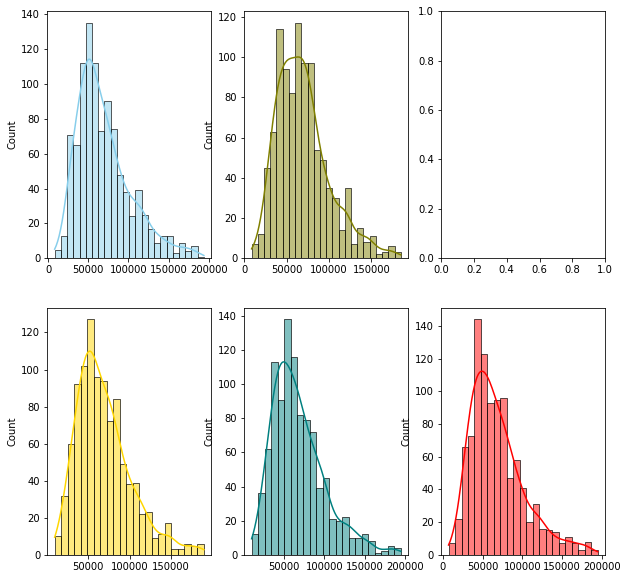

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(10, 10))

sns.histplot(data=df1, kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df2, kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df3, kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df4, kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df5, kde=True, color="red", ax=axs[1, 2])

plt.show()

**Central Limit Theorem**

The phenomenon we’ve just described is termed the central limit theorem. It says that
the means drawn from multiple samples will resemble the familiar bell-shaped normal
curve even if the source population is
not normally distributed, provided that the sample size is large enough and the
departure of the data from normality is not too great. The central limit theorem
allows normal-approximation formulas like the t-distribution to be used in calculating
sampling distributions for inference—that is, confidence intervals and hypothesis
tests.

**Standard error**

The standard error is a single metric that sums up the variability in the sampling distribution
for a statistic. The standard error can be estimated using a statistic based on
the standard deviation s of the sample values, and the sample size n:

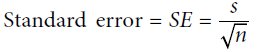

As the sample size increases, the standard error decreases.

**The Bootstrap**

One easy and effective way to estimate the sampling distribution of a statistic, or of
model parameters, is to draw additional samples, with replacement, from the sample
itself and recalculate the statistic or model for each resample. This procedure is called
the bootstrap, and it does not necessarily involve any assumptions about the data or
the sample statistic being normally distributed.

- Bootstrap sample:
A sample taken with replacement from an observed data set.

- Resampling:
The process of taking repeated samples from observed data; includes both bootstrap
and permutation (shuffling) procedures.

Conceptually, you can imagine the bootstrap as replicating the original sample thousands
or millions of times so that you have a hypothetical population that embodies
all the knowledge from your original sample (it’s just larger). You can then draw samples
from this hypothetical population for the purpose of estimating a sampling distribution

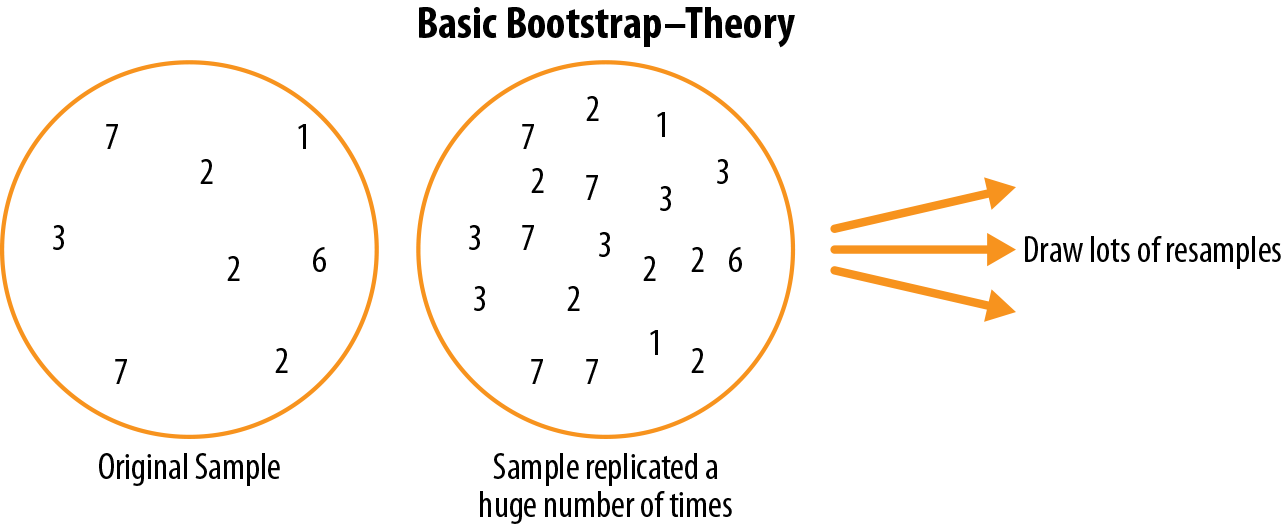

-> in pratica, estraggo dal campione (es. 8) un medesimo numero di campioni (sempre 8) ma col fatto che posso duplicare gli elementi. 

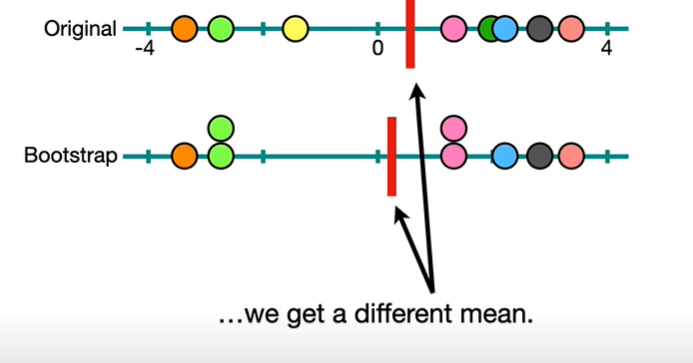

---> nella pratica, da un campione di n elementi ne estraggo nuovamente n (anche con doppioni) e valuto la statistica che voglio studiare

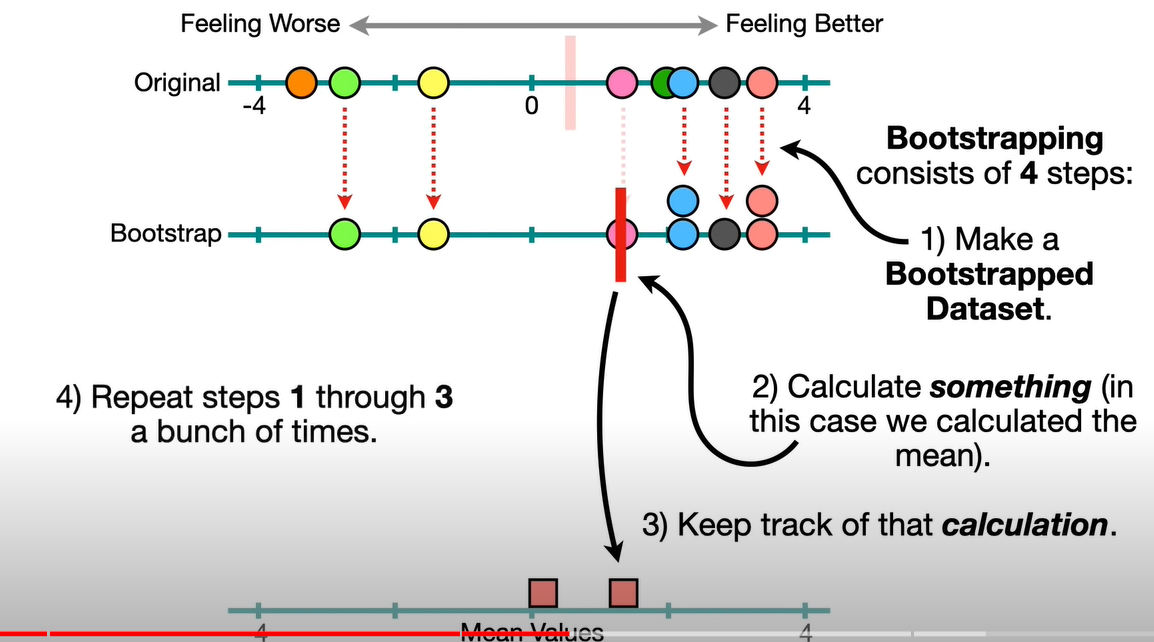

The more
iterations you do, the more accurate the estimate of the standard error, or the confidence
interval. The result from this procedure is a bootstrap set of sample statistics or
estimated model parameters, which you can then examine to see how variable they
are.

**The bootstrap does not compensate for a small sample size; it does not create new data, nor does it fill in holes in an existing data set. It merely informs us about how lots of additional samples would behave when drawn from a population like our original sample.**

--> il sample sarebbe la totalità dei dati che ho a disposizione su una popolazione che non conosco al 100%& (es. ho 10_000 persone per fare una statistica sull'intera specie umana) oppure  ho quantità di dati enormi e ne selezioni un campione perchè non ho la capacità computazionale per fare i test del caso --> uso un campione

In [37]:
sample1 = sample(list(loan['x']),1000)

result = []

for i in range(10_000):
  s = np.random.choice(sample1,1000)
  result.append(np.mean(s))

NameError: name 'loan' is not defined

In [ ]:
print('real mean: ',np.mean(loan['x']))

real mean:  68760.51844


In [ ]:
fig = px.histogram(result, nbins=10)
fig.show()

- The bootstrap (sampling with replacement from a data set) is a powerful tool for
assessing the variability of a sample statistic.
- The bootstrap can be applied in similar fashion in a wide variety of circumstances,
without extensive study of mathematical approximations to sampling distributions.
- It also allows us to estimate sampling distributions for statistics where no mathematical
approximation has been developed.
- When applied to predictive models, aggregating multiple bootstrap sample predictions
(bagging) outperforms the use of a single model.

## **Confidence Intervals**

Frequency tables, histograms, boxplots, and standard errors are all ways to understand
the potential error in a sample estimate. Confidence intervals are another.

- Confidence level:
The percentage of confidence intervals, constructed in the same way from the
same population, that are expected to contain the statistic of interest.
- Interval endpoints:
The top and bottom of the confidence interval.

Analysts and managers, while acknowledging uncertainty,
nonetheless place undue faith in an estimate when it is presented as a single number
(a point estimate). Presenting an estimate not as a single number but as a range is one
way to counteract this tendency. Confidence intervals do this in a manner grounded
in statistical sampling principles.

Confidence intervals always come with a coverage level, expressed as a (high) percentage,
say 90% or 95%. One way to think of a 90% confidence interval is as follows:
it is the interval that encloses the central 90% of the bootstrap sampling distribution
of a sample statistic

More generally, an x% confidence
interval around a sample estimate should, on average, contain similar sample
estimates x% of the time (when a similar sampling procedure is followed).
Given a sample of size n, and a sample statistic of interest, the algorithm for a bootstrap
confidence interval is as follows:
1. Draw a random sample of size n with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many (R) times.
4. For an x% confidence interval, trim [(100-x) / 2]% of the R resample results from
either end of the distribution.
5. The trim points are the endpoints of an x% bootstrap confidence interval.

In [ ]:
sample1 = sample(list(loan['x']),1000)
result = []

for i in range(10_000):
  s = np.random.choice(sample1,1000)
  result.append(np.mean(s))

result.sort()

# per avere una confidenza del 95% trimmero il 5% dei dati
result_trim = result[int(int(len(result))*(2.5)/100):int(int(len(result)-(int(len(result))*(2.5)/100)))]

**Un intervallo di confidenza del 95% è un intervallo che copre il 95% delle medie calcolate**

In [ ]:
fig = px.histogram(result_trim, nbins=100)
fig.show()

The percentage associated with the confidence interval is termed the level of confidence.
The higher the level of confidence, the wider the interval. Also, the smaller the
sample, the wider the interval (i.e., the greater the uncertainty). Both make sense: the
more confident you want to be, and the less data you have, the wider you must make
the confidence interval to be sufficiently assured of capturing the true value.
For a data scientist, a confidence interval is a tool that can be used
to get an idea of how variable a sample result might be. Data scientists
would use this information not to publish a scholarly paper or
submit a result to a regulatory agency (as a researcher might) but
most likely to communicate the potential error in an estimate, and
perhaps to learn whether a larger sample is needed.

**explanation**: https://www.youtube.com/watch?v=TqOeMYtOc1w

## **Normal Distribution**

In a normal distribution, 68% of the data lies within one standard deviation
of the mean, and 95% lies within two standard deviations.

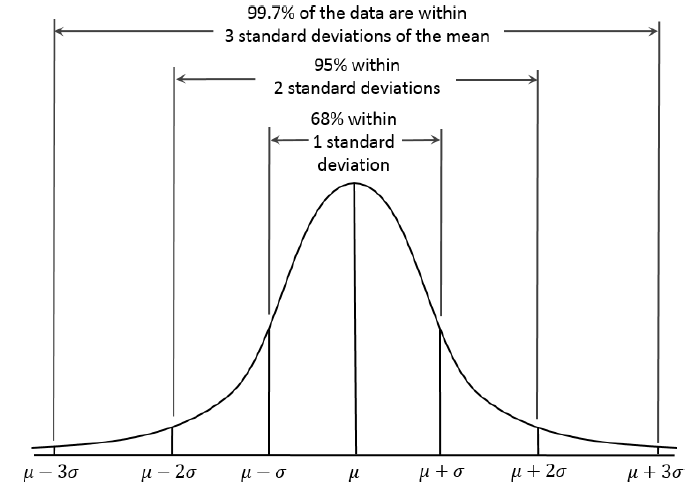

- **Error:**
The difference between a data point and a predicted or average value.

- **Standardize:**
Subtract the mean and divide by the standard deviation.

- **z-score:**
The result of standardizing an individual data point.

- **Standard normal:**
A normal distribution with mean = 0 and standard deviation = 1.

- **QQ-Plot:**
A plot to visualize how close a sample distribution is to a specified distribution,
e.g., the normal distribution.



**Standard Normal and QQ-Plots**: A standard normal distribution is one in which the units on the x-axis are expressed
in terms of standard deviations away from the mean. To compare data to a standard
normal distribution, you subtract the mean and then divide by the standard deviation;
this is also called normalization or standardization

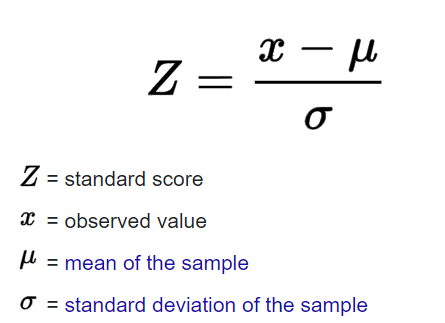

A **QQ-Plot is used to visually determine how close a sample is to a specified distribution—
in this case, the normal distribution**. The QQ-Plot orders the z-scores from low
to high and plots each value’s z-score on the y-axis; the x-axis is the corresponding
quantile of a normal distribution for that value’s rank. Since the data is normalized,
the units correspond to the number of standard deviations away from the mean. If
the points roughly fall on the diagonal line, then the sample distribution can be considered
close to normal

## -->  **posso confrontare due distribuzioni!**

Converting data to z-scores (i.e., standardizing or normalizing the
data) does not make the data normally distributed. It just puts the
data on the same scale as the standard normal distribution, often
for comparison purposes.

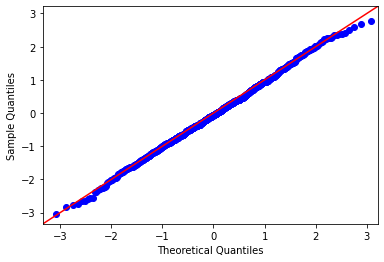

In [ ]:
np.random.seed(0)
data = np.random.normal(0,1, 1000)
fig = sm.qqplot(data, line='45')
plt.show()

### **Long-Tailed Distributions**

Despite the importance of the normal distribution historically in statistics, and in
contrast to what the name would suggest, data is generally not normally distributed.

- **Tail**:
The long narrow portion of a frequency distribution, where relatively extreme
values occur at low frequency.

- **Skew**:
Where one tail of a distribution is longer than the other.

While the normal distribution is often appropriate and useful with respect to the distribution
of errors and sample statistics, it typically does not characterize the distribution
of raw data. Sometimes, the distribution is highly skewed (asymmetric), such as
with income data; or the distribution can be discrete, as with binomial data. Both
symmetric and asymmetric distributions may have long tails. The tails of a distribution
correspond to the extreme values (small and large).

In [ ]:
from google.colab import files
uploaded = files.upload()

sp500 = pd.read_csv('sp500_data.csv')

sp500.head()

Saving sp500_data.csv to sp500_data.csv


,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [ ]:
data_nflx=sp500[sp500['NFLX']>0].NFLX

Molti dati non sono distribuiti in modo normale, questo è un esempio:

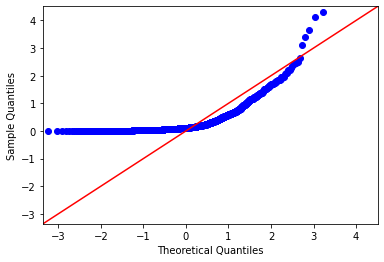

In [ ]:
fig = sm.qqplot(data_nflx, line='45')
plt.show()

## **Student’s t-Distribution**

The t-distribution is a normally shaped distribution, except that it is a bit thicker and
longer on the tails. It is used extensively in depicting distributions of sample statistics. It is used for large sample

- n:
Sample size.

- Degrees of freedom: 
A parameter that allows the t-distribution to adjust to different sample sizes, statistics,
and numbers of groups.

A number of different statistics can be compared, after standardization, to the tdistribution,
to estimate confidence intervals in light of sampling variation. Consider
a sample of size n for which the sample mean x has been calculated. If s is the sample
standard deviation, a 90% confidence interval around the sample mean is given by:

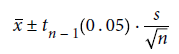

where t n − 1 (. 05) is the value of the t-statistic, with (n – 1) degrees of freedom, that “chops off ” 5% of the t-distribution at either
end. The t-distribution has been used as a reference for the distribution of a sample
mean, the difference between two sample means, regression parameters, and other
statistics.

What do data scientists need to know about the t-distribution and
the central limit theorem? Not a whole lot. The t-distribution is
used in classical statistical inference but is not as central to the purposes
of data science. Understanding and quantifying uncertainty
and variation are important to data scientists, but empirical bootstrap
sampling can answer most questions about sampling error.
However, data scientists will routinely encounter t-statistics in output
from statistical software and statistical procedures in R—for
example, in A/B tests and regressions—so familiarity with its purpose
is helpful.

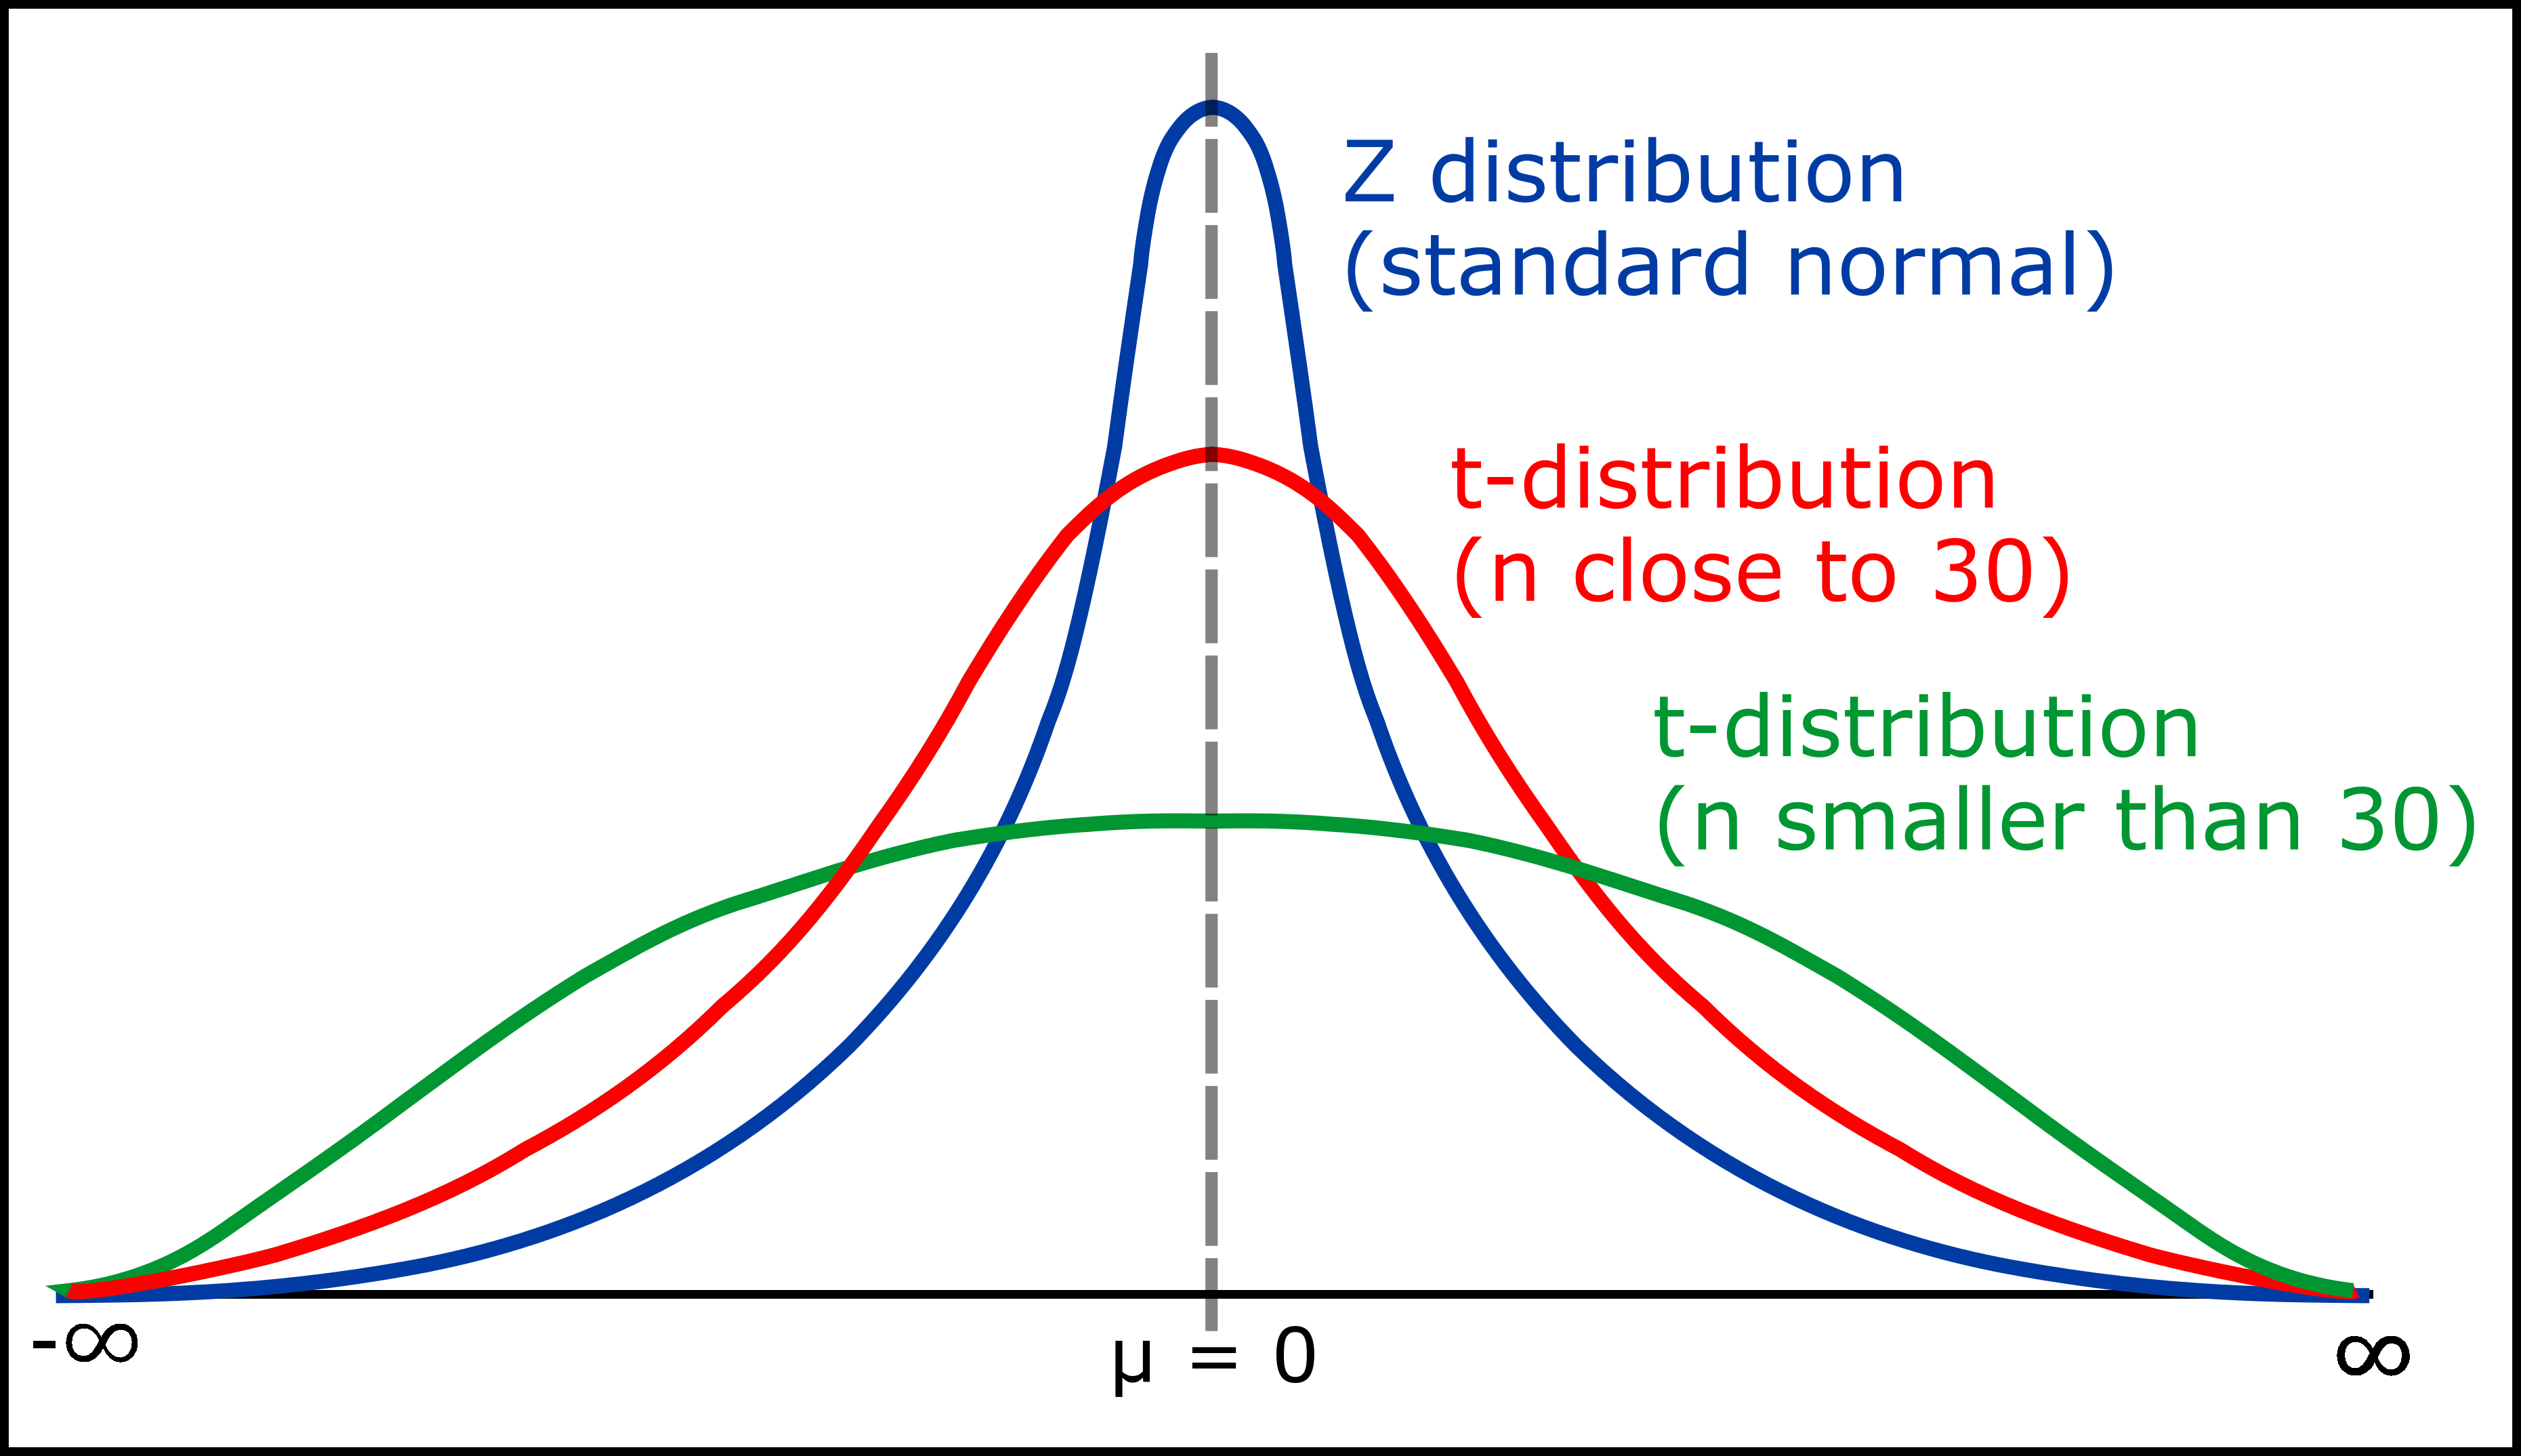

## **Binomial Distribution**

Yes/no (binomial): Central to understanding the binomial distribution is the idea of a set of
trials, each trial having two possible outcomes with definite probabilities.

The binomial distribution is the frequency distribution of the number of successes (x)
in a given number of trials (n) with specified probability (p) of success in each trial.
There is a family of binomial distributions, depending on the values of n and p. The
binomial distribution would answer a question like:
If the probability of a click converting to a sale is 0.02, what is the probability of
observing 0 sales in 200 clicks?

- **Trial**:
An event with a discrete outcome (e.g., a coin flip).

- **Success**:
The outcome of interest for a trial.
Synonym
“1” (as opposed to “0”)

- **Binomial**:
Having two outcomes.
Synonyms
yes/no, 0/1, binary

- **Binomial trial**:
A trial with two outcomes.
Synonym
Bernoulli trial

- **Binomial distribution**:
Distribution of number of successes in x trials.
Synonym
Bernoulli distribution

In [ ]:
# probability mass function for binom

stats.binom.pmf(2, n=5, p=0.1)

0.07289999999999992

In [ ]:
# Cumulative density function

stats.binom.cdf(2, n=5, p=0.1)

0.99144

- Binomial outcomes are important to model, since they represent, among other
things, fundamental decisions (buy or don’t buy, click or don’t click, survive or
die, etc.).
- A binomial trial is an experiment with two possible outcomes: one with probability
p and the other with probability 1 – p.
- With large n, and provided p is not too close to 0 or 1, the binomial distribution
can be approximated by the normal distribution.

## **Chi-Square Distribution**

Un'idea importante in statistica è l'**allontanamento dall'aspettativa, specialmente per quanto riguarda i conteggi di
categoria. L'aspettativa è definita in modo approssimativo come "nulla di insolito o degno di nota nei dati"** (ad esempio, nessuna correlazione tra le variabili o modelli prevedibili).
dati" (ad esempio, nessuna correlazione tra le variabili o modelli prevedibili). Questa è anche definita "ipotesi nulla" o "modello nullo".
Ad esempio, si potrebbe voler verificare se una variabile (ad esempio, una variabile di riga che rappresenta il sesso) sia indipendente da un'altra (ad esempio, una variabile di riga che rappresenta il sesso).
sesso) sia indipendente da un'altra (ad esempio, una variabile di colonna che rappresenta "è stata
promozione nel lavoro"), e si dispone del conteggio del numero in ciascuna cella della tabella dei dati.
tabella. **La statistica che misura la misura in cui i risultati si discostano dall'aspettativa nulla di indipendenza è il chi-quadro. È la differenza tra i valori
valori osservati e quelli attesi, divisa per la radice quadrata del valore atteso,
al quadrato, quindi sommata per tutte le categorie**. Questo processo standardizza la statistica in modo che
in modo da poterla confrontare con una distribuzione di riferimento. Un modo più generale per spiegare questo concetto è
che la **statistica chi-quadro è una misura della misura in cui un insieme di valori osservati "si adatta" a una distribuzione specifica. È utile per
determinare se più trattamenti (un "test A/B/C...") differiscono l'uno dall'altro nei loro effetti.**
nei loro effetti.
La distribuzione chi-quadro è la distribuzione di questa statistica sotto ripetute estrazioni ricampionate dal modello nullo. **Un basso valore del chi-quadro per un
un insieme di conteggi indica che questi seguono fedelmente la distribuzione prevista. Un valore chi-quadrato alto
indica che si discostano nettamente da quanto previsto**. Esiste una varietà
distribuzioni chi-quadro associate a diversi gradi di libertà (ad esempio, numero di osservazioni).

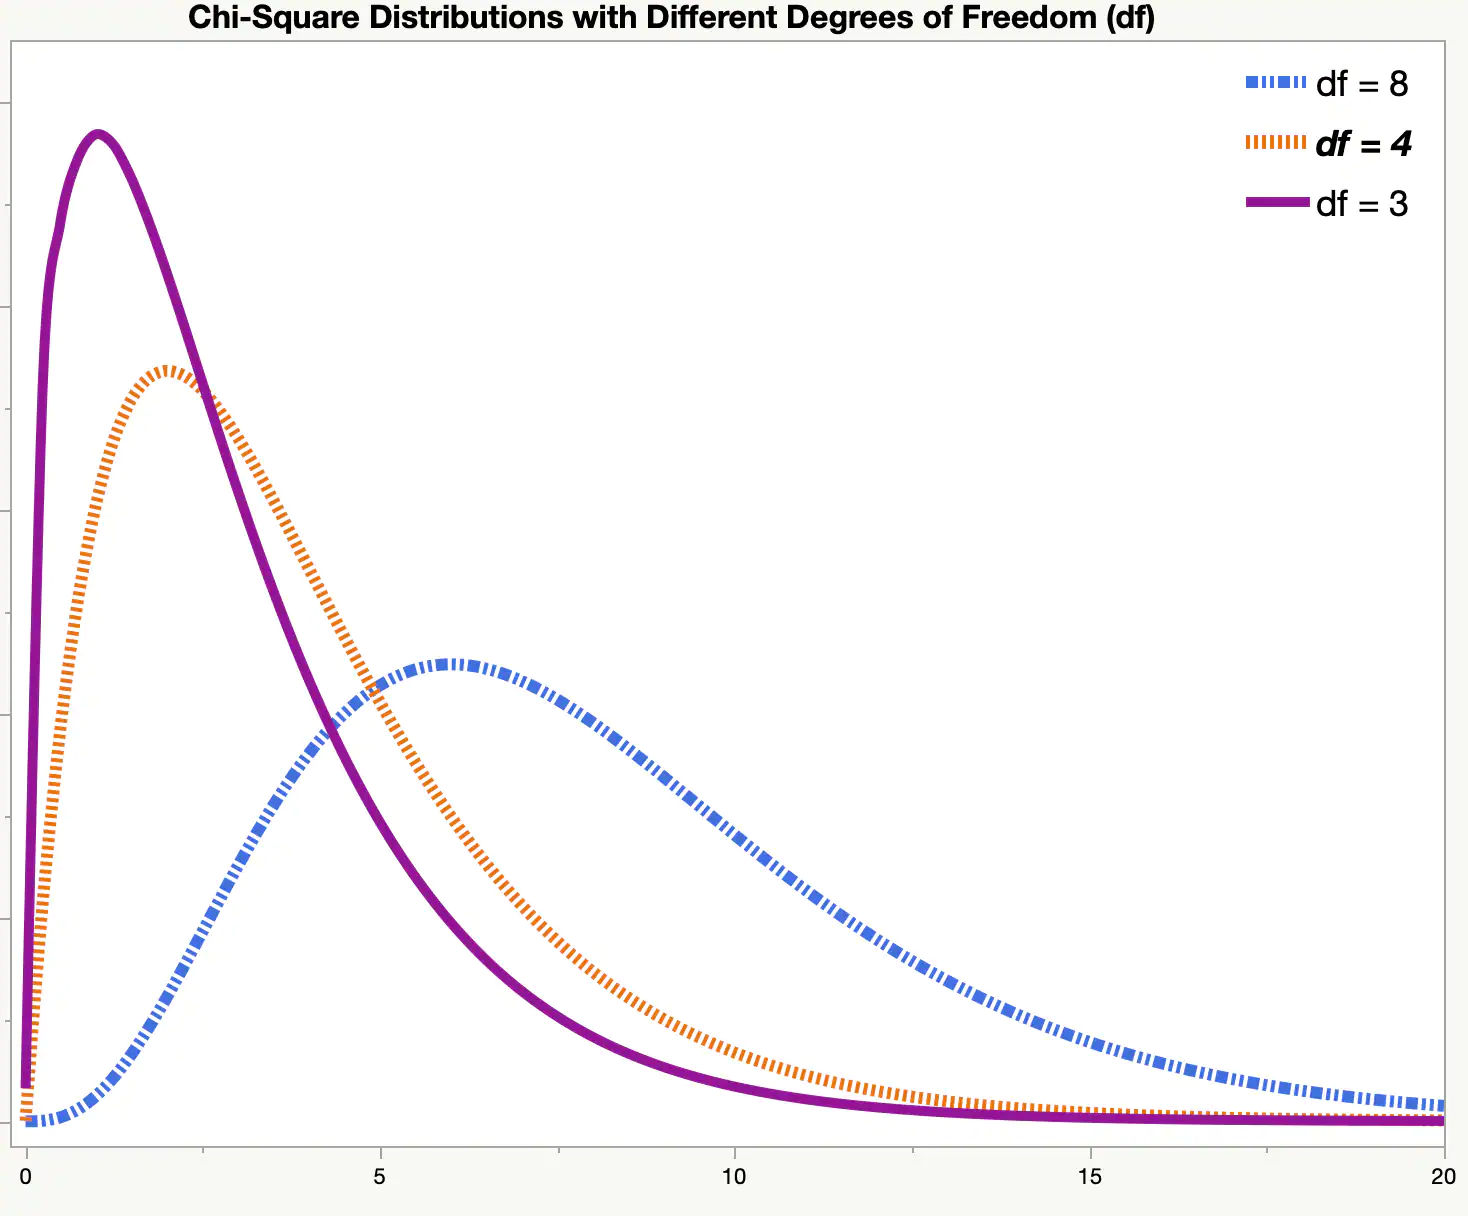

## **F-Distribution**

Una procedura comune nella sperimentazione scientifica è quella di testare più trattamenti
tra gruppi, ad esempio diversi fertilizzanti su diversi blocchi di un campo. **Questa procedura è simile al
al test A/B/C di cui alla distribuzione chi-quadro, con la differenza che abbiamo a che fare con valori continui misurati piuttosto che con conteggi
 In questo caso siamo interessati alla misura in cui le differenze tra le medie del gruppo
gruppo sono maggiori di quanto ci si potrebbe aspettare in presenza di una normale variazione casuale. La statistica F
misura questo aspetto ed è il rapporto tra la variabilità tra le medie del gruppo e la
variabilità all'interno di ciascun gruppo (detta anche variabilità residua)**. Questo confronto è
è definito **analisi della varianza ("ANOVA")**. La distribuzione della statistica F
è la distribuzione di frequenza di tutti i valori che si otterrebbero con una permutazione casuale dei dati in cui tutti i gruppi
dati in cui tutte le medie dei gruppi sono uguali (cioè un modello nullo).
Esiste una varietà di distribuzioni F associate a diversi gradi di libertà. La statistica F viene utilizzata anche nella regressione lineare
per confrontare la variazione rappresentata dal modello di regressione con la variazione complessiva dei dati. La statistica F viene prodotta automaticamente da R e Python come parte
delle routine di regressione e ANOVA.


## **Poisson and Related Distributions**

Many processes produce events randomly at a given overall rate—visitors arriving at
a website, or cars arriving at a toll plaza (events spread over time); imperfections in a
square meter of fabric, or typos per 100 lines of code (events spread over space).

- **Lambda**
The rate (per unit of time or space) at which events occur.

- **Poisson distribution**
The frequency distribution of the number of events in sampled units of time or
space.

- **Exponential distribution**
The frequency distribution of the time or distance from one event to the next
event.

- **Weibull distribution**
A generalized version of the exponential distribution in which the event rate is
allowed to shift over time.

## **Poisson Distributions**

A partire da dati aggregati precedenti (ad esempio, il numero di infezioni influenzali all'anno), si può
stimare il numero medio di eventi per unità di tempo o di spazio (ad esempio, infezioni al giorno o per unità di censimento). Potremmo anche voler sapere quanto questo potrebbe essere diverso
da un'unità di tempo/spazio a un'altra. La distribuzione di Poisson ci dice la distribuzione
degli eventi per unità di tempo o di spazio quando si campionano molte unità di questo tipo. È utile
è utile quando si affrontano questioni di accodamento come "Di quanta capacità abbiamo bisogno per essere
95% di essere sicuri di elaborare completamente il traffico internet che arriva su un server in un periodo di cinque secondi?
di cinque secondi?".
Il parametro chiave di una distribuzione di Poisson è λ, o lambda. Si tratta del numero medio
di eventi che si verificano in un determinato intervallo di tempo o di spazio. La varianza di una distribuzione di Poisson
distribuzione di Poisson è anch'essa λ.

In [ ]:
stats.poisson.rvs(2, size=100)

array([7, 0, 4, 0, 4, 3, 1, 2, 3, 2, 1, 3, 0, 4, 2, 4, 3, 1, 0, 1, 2, 3,
       2, 1, 4, 4, 1, 3, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 3, 2, 1, 4, 2, 2,
       0, 5, 3, 3, 6, 1, 1, 3, 2, 2, 1, 5, 1, 4, 1, 0, 1, 2, 6, 1, 4, 4,
       3, 3, 2, 5, 2, 1, 3, 5, 1, 5, 2, 0, 1, 3, 1, 0, 2, 7, 0, 1, 3, 0,
       4, 2, 3, 0, 4, 4, 1, 1, 6, 3, 0, 1])

## **Exponential Distribution**

Using the same parameter λ that we used in the Poisson distribution, we can also
model the distribution of the time between events: time between visits to a website or
between cars arriving at a toll plaza. It is also used in engineering to model time to
failure, and in process management to model, for example, the time required per service
call.

In teoria delle probabilità la distribuzione esponenziale è una distribuzione di probabilità continua che descrive la "durata di vita" di un fenomeno che non invecchia

In [ ]:
stats.expon.rvs(0.2, size=100)

array([1.21711404, 0.30732942, 1.3178261 , 1.81855872, 0.40495119,
       0.73635757, 0.9339379 , 0.8011279 , 1.80858793, 3.43202181,
       1.80421738, 0.28120227, 1.83442538, 0.26891752, 0.46914873,
       0.36616899, 0.42004723, 0.95144416, 1.31379656, 0.83548465,
       3.4112956 , 0.47482155, 1.640287  , 2.24162318, 1.02568732,
       0.80921513, 1.10679706, 0.76003297, 1.01011678, 0.73945481,
       0.71160878, 1.38858011, 0.2974488 , 0.38217206, 2.10514189,
       1.67437109, 0.53052517, 0.67364053, 2.80404845, 1.904173  ,
       1.15281546, 0.45037367, 0.24526097, 0.76432811, 1.31665551,
       1.96305826, 2.11520932, 0.23332506, 0.47992164, 0.61414455,
       0.40915708, 1.82442658, 1.65871781, 0.92739301, 4.27022644,
       0.35555329, 2.49910818, 0.3238224 , 0.37814832, 1.39144889,
       0.31605044, 1.03435389, 0.74512991, 1.50369725, 2.50936038,
       1.66911749, 2.09505463, 0.23350037, 0.57134705, 0.92449975,
       0.73777436, 0.4629959 , 0.5679874 , 3.10828878, 0.54839

**A key assumption in any simulation study for either the Poisson or exponential distribution
is that the rate, λ, remains constant over the period being considered. This is
rarely reasonable in a global sense; for example, traffic on roads or data networks
varies by time of day and day of week. However, the time periods, or areas of space,
can usually be divided into segments that are sufficiently homogeneous so that analysis
or simulation within those periods is valid.**

## **Weibull Distribution**

In many cases, the event rate does not remain constant over time. If the period over
which it changes is much longer than the typical interval between events, there is no
problem; you just subdivide the analysis into the segments where rates are relatively
constant, as mentioned before.**If, however, the event rate changes over the time of the
interval, the exponential (or Poisson) distributions are no longer useful**. This is likely
to be the case in mechanical failure—the risk of failure increases as time goes by. **The
Weibull distribution is an extension of the exponential distribution in which the event
rate is allowed to change, as specified by a shape parameter, β. If β > 1, the probability
of an event increases over time; if β < 1, the probability decreases**. Because the Weibull
distribution is used with time-to-failure analysis instead of event rate, the second
parameter is expressed in terms of characteristic life, rather than in terms of the rate
of events per interval. The symbol used is η, the Greek letter eta. It is also called the
scale parameter.

## **tips:**

- For events that occur at a constant rate, the number of events per unit of time or
space can be modeled as a Poisson distribution.
- You can also model the time or distance between one event and the next as an
exponential distribution.
- A changing event rate over time (e.g., an increasing probability of device failure)
can be modeled with the Weibull distribution.

---
---
# **3. Statistical Experiments and Significance Testing**

The goal is to design an experiment in order to confirm
or reject a hypothesis. This process starts with a hypothesis (“drug A is better than the existing standard
drug,” or “price A is more profitable than the existing price B”). An experiment (it
might be an A/B test) is designed to test the hypothesis—designed in such a way that
it hopefully will deliver conclusive results. The data is collected and analyzed, and
then a conclusion is drawn. **The term inference reflects the intention to apply the
experiment results, which involve a limited set of data, to a larger process or
population.**

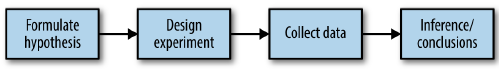

## **A/B Testing**

A/B testing in data science is typically used in a web context

An A/B test is an experiment with two groups to establish which of two treatments,
products, procedures, or the like is superior. Often one of the two treatments is the
standard existing treatment, or no treatment. If a standard (or no) treatment is used,
it is called the control. A typical hypothesis is that a new treatment is better than the
control.

- **Treatment:**
Something (drug, price, web headline) to which a subject is exposed.

- **Treatment group:**
A group of subjects exposed to a specific treatment.

- **Control group:**
A group of subjects exposed to no (or standard) treatment.

- **Randomization:**
The process of randomly assigning subjects to treatments.

- **Subjects:**
The items (web visitors, patients, etc.) that are exposed to treatments.

- **Test statistic:**
The metric used to measure the effect of the treatment.

A/B tests are common in web design and marketing, since results are so readily measured.
Some examples of A/B testing include:
- Testing two soil treatments to determine which produces better seed germination
- Testing two therapies to determine which suppresses cancer more effectively
- Testing two prices to determine which yields more net profit
- Testing two web headlines to determine which produces more clicks (Figure 3-2)
- Testing two web ads to determine which generates more conversions

A proper A/B test has subjects that can be assigned to one treatment or another. The
subject might be a person, a plant seed, a web visitor; the key is that the subject is
exposed to the treatment.Ideally, subjects are randomized (assigned randomly) to
treatments. In this way, you know that any difference between the treatment groups is
due to one of two things:
- The effect of the different treatments
- Luck of the draw in which subjects are assigned to which treatments (i.e., the random
assignment may have resulted in the naturally better-performing subjects
being concentrated in A or B)

You also need to pay attention to the test statistic or metric you use to compare group
A to group B. Perhaps **the most common metric in data science is a binary variable**:
click or no-click, buy or don’t buy, fraud or no fraud, and so on. Those results would
be summed up in a 2×2 table.

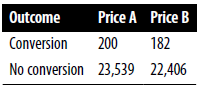

If **the metric is a continuous variable** (purchase amount, profit, etc.) or a count (e.g.,
days in hospital, pages visited), the result might be displayed differently. If one were
interested not in conversion but in revenue per page view, the results of the price test might look like this in typical default software output:
- Revenue/page view with price A: mean = 3.87, SD = 51.10
- Revenue/page view with price B: mean = 4.11, SD = 62.98

Why not skip the control group and just run an experiment applying the treatment of
interest to only one group, and compare the outcome to prior experience?
Without a control group, there is no assurance that “all other things are equal” and
that any difference is really due to the treatment (or to chance).

Traditional statistical experimental designs focus on answering a static question about
the efficacy of specified treatments. Data scientists are less interested in the question:

- Is the difference between price A and price B statistically significant?

than in the question:

- Which, out of multiple possible prices, is best?

For this, a relatively new type of experimental design is used: the multi-arm bandit

**--> multi-arm bandit** for A/B/C/D... TEST

## **Hypothesis Tests**

Their purpose is to help you learn whether random
chance might be responsible for an observed effect.

- **Null hypothesis:**
The hypothesis that chance is to blame.

- **Alternative hypothesis:**
Counterpoint to the null (what you hope to prove).

- **One-way test:**
Hypothesis test that counts chance results only in one direction.

- **Two-way test:**
Hypothesis test that counts chance results in two directions.

**A statistical hypothesis test is further analysis of an A/B test, or any randomized
experiment, to assess whether random chance is a reasonable explanation for the
observed difference between groups A and B.**

**The Null Hypothesis:** Hypothesis tests use the following logic: “Given the human tendency to react to
unusual but random behavior and interpret it as something meaningful and real, in
our experiments we will require proof that the difference between groups is more
extreme than what chance might reasonably produce.” This involves a baseline
assumption that the treatments are equivalent, and any difference between the groups
is due to chance. This baseline assumption is termed the null hypothesis. Our hope,
then, is that we can in fact prove the null hypothesis wrong and show that the outcomes
for groups A and B are more different than what chance might produce.

- A null hypothesis is a logical construct embodying the notion that nothing special
has happened, and any effect you observe is due to random chance.
- The hypothesis test assumes that the null hypothesis is true, creates a “null
model” (a probability model), and tests whether the effect you observe is a reasonable
outcome of that model.

**Alternative Hypothesis:**
Hypothesis tests by their nature involve not just a null hypothesis but also an offsetting
alternative hypothesis. Here are some examples:
- Null = “no difference between the means of group A and group B”; alternative =
“A is different from B” (could be bigger or smaller)
- Null = “A ≤ B”; alternative = “A > B”
- Null = “B is not X% greater than A”; alternative = “B is X% greater than A”
Taken together, the null and alternative hypotheses must account for all possibilities.
The nature of the null hypothesis determines the structure of the hypothesis test.

**One-Way Versus Two-Way Hypothesis Tests**

Often in an A/B test, you are testing a new option (say, B) against an established
default option (A), and the presumption is that you will stick with the default option
unless the new option proves itself definitively better. In such a case, you want a
hypothesis test to protect you from being fooled by chance in the direction favoring
B. You don’t care about being fooled by chance in the other direction, because you
would be sticking with A unless B proves definitively better. So you want a directional
alternative hypothesis (B is better than A). In such a case, you use a one-way (or onetail)
hypothesis test. This means that extreme chance results in only one direction
count toward the p-value.
If you want a hypothesis test to protect you from being fooled by chance in either
direction, the alternative hypothesis is bidirectional (A is different from B; could be
bigger or smaller). In such a case, you use a two-way (or two-tail) hypothesis. This
means that extreme chance results in either direction count toward the p-value.
A one-tail hypothesis test often fits the nature of A/B decision making, in which a
decision is required and one option is typically assigned “default” status unless the
other proves better.

### **Resampling**

Ricampionare in statistica significa campionare ripetutamente i valori dei dati osservati, con l'obiettivo generale di valutare la variabilità casuale di una statistica.
obiettivo generale di valutare la variabilità casuale di una statistica.

There are two main types of resampling procedures: the bootstrap and permutation
tests. The bootstrap is used to assess the reliability of an estimate; Permutation tests are used to
test hypotheses, typically involving two or more groups, and we discuss those in this
section.

- **Permutation test:**
The procedure of combining two or more samples together and randomly (or
exhaustively) reallocating the observations to resamples.
Synonyms
Randomization test, random permutation test, exact test
- **Resampling:**
Drawing additional samples (“resamples”) from an observed data set.
- **With or without replacement:**
In sampling, whether or not an item is returned to the sample before the next
draw.

**Permutation Test**
In a permutation procedure, two or more samples are involved, typically the groups
in an A/B or other hypothesis test. Permute means to change the order of a set of values.
The first step in a permutation test of a hypothesis is to combine the results from
groups A and B (and, if used, C, D,…).

The permutation procedure is as
follows:
1. Combine the results from the different groups into a single data set.
2. Shuffle the combined data and then randomly draw (without replacement) a
resample of the same size as group A (clearly it will contain some data from the
other groups).
3. From the remaining data, randomly draw (without replacement) a resample of
the same size as group B.
4. Do the same for groups C, D, and so on. You have now collected one set of
resamples that mirror the sizes of the original samples.
5. Whatever statistic or estimate was calculated for the original samples (e.g., difference
in group proportions), calculate it now for the resamples, and record; this
constitutes one permutation iteration.
6. Repeat the previous steps R times to yield a permutation distribution of the test
statistic.

Now go back to the observed difference between groups and compare it to the set of
permuted differences. If the observed difference lies well within the set of permuted
differences, then we have not proven anything—the observed difference is within the
range of what chance might produce. However, if the observed difference lies outside
most of the permutation distribution, then we conclude that chance is not responsible.
In technical terms, the difference is statistically significant

**Example**

A company selling a relatively high-value service wants to test which of two web presentations
does a better selling job. Due to the high value of the service being sold,
sales are infrequent and the sales cycle is lengthy; it would take too long to accumulate
enough sales to know which presentation is superior. So the company decides to
measure the results with a proxy variable, using the detailed interior page that
describes the service.
A proxy variable is one that stands in for the true variable of interest,
which may be unavailable, too costly, or too time-consuming to
measure. In climate research, for example, the oxygen content of
ancient ice cores is used as a proxy for temperature. It is useful to
have at least some data on the true variable of interest, so the
strength of its association with the proxy can be assessed.
One potential proxy variable for our company is the number of clicks on the detailed
landing page. 

A better one is how long people spend on the page. It is reasonable to
think that a web presentation (page) that holds people’s attention longer will lead to
more sales. Hence, our metric is average session time, comparing page A to page B.
Due to the fact that this is an interior, special-purpose page, it does not receive a huge
number of visitors. Also note that Google Analytics, which is how we measure session
time, cannot measure session time for the last session a person visits. Instead of deleting
that session from the data, though, Google Analytics records it as a zero, so the
data requires additional processing to remove those sessions. The result is a total of
36 sessions for the two different presentations, 21 for page A and 15 for page B. Using
ggplot, we can visually compare the session times using side-by-side boxplots

In [24]:
web_page_data = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/web_page_data.csv')
web_page_data.head(10)

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67
5,Page B,0.85
6,Page A,2.11
7,Page B,2.46
8,Page A,1.32
9,Page B,1.49


In [25]:
pagina_media = web_page_data.groupby(by=["Page"]).mean().reset_index()

In [26]:
pagina_media

,Page,Time
0,Page A,1.263333
1,Page B,1.620000


In [27]:
pagina_media.iloc[1,1] - pagina_media.iloc[0,1]

0.35666666666666713

Page B has session times that are greater than those of page A by 35.67 seconds, on
average. The question is whether this difference is within the range of what random
chance might produce, i.e., is statistically significant. One way to answer this is to
apply a permutation test—combine all the session times together and then repeatedly
shuffle and divide them into groups of 21 (recall that nA = 21 for page A) and 15
(nB = 15 for page B)

In [28]:
print('N a: ',len(web_page_data[web_page_data['Page']=='Page A']))
print('N b: ',len(web_page_data[web_page_data['Page']=='Page B']))

N a:  21
N b:  15


In [29]:
def permutation (df, rd):

  dfa = df['Time'].sample(n=int(len(web_page_data[web_page_data['Page']=='Page A'])), random_state=rd)
  dfb = df['Time'].sample(n=int(len(web_page_data[web_page_data['Page']=='Page B'])), random_state=rd)

  return dfa.mean(),dfb.mean()

In [30]:
Medie = []
for i in range(1000):
  meanA, meanB = permutation(web_page_data, i)
  Medie.append((meanA - meanB))

In [31]:
((pagina_media.iloc[1,1] - pagina_media.iloc[0,1] ))

0.35666666666666713

In rosso si vede come la media sia ancora all'interno del range delle altre medie, quindi non è statisticamente significante -> altre prove

In [32]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=Medie))

fig.add_trace(
    go.Bar(
        x=[((pagina_media.iloc[1,1] - pagina_media.iloc[0,1] ))],
        y=[20]
    ))

fig.show()

In [33]:
 def perm_fun(x, nA, nB):
  n = nA + nB
  idx_B = set(random.sample(range(n), nB))
  idx_A = set(range(n)) - idx_B
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()

Text(0, 0.5, 'Frequency')

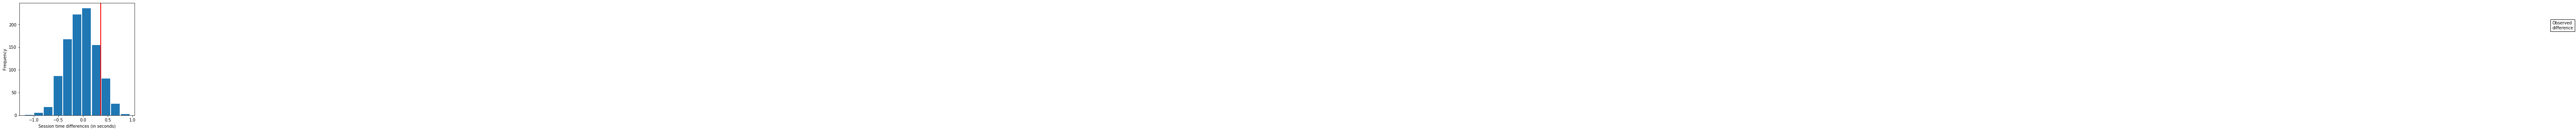

In [34]:
perm_diffs = [perm_fun(web_page_data.Time, 21, 15) for _ in range(1000)]
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = ((pagina_media.iloc[1,1] - pagina_media.iloc[0,1])), color='red', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

--> **This suggests that the observed difference in session time between page A and page B
is well within the range of chance variation and thus is not statistically significant**

In [35]:
perm_fun(web_page_data.Time, 21, 15)

-0.20447619047619003

### **Statistical Significance and p-Values**

Statistical significance is how statisticians measure whether an experiment (or even a
study of existing data) yields a result more extreme than what chance might produce.
**If the result is beyond the realm of chance variation, it is said to be statistically
significant.**

- **p-value:** Dato un modello casuale che incarna l'ipotesi nulla, il valore p è la probabilità di ottenere risultati insoliti o estremi come quelli osservati.

- **alpha:** La soglia di probabilità di "inusualità" che i risultati casuali devono superare perché i risultati effettivi siano considerati
risultati effettivi per essere considerati statisticamente significativi.


- **Type 1 error:**
Mistakenly concluding an effect is real (when it is due to chance).

- **Type 2 error:**
Mistakenly concluding an effect is due to chance (when it is real).
Statistical

**Example:**

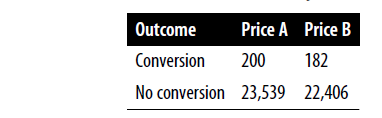


Price A converts almost 5% better than price B (0.8425% = 200/(23539+200)*100,
versus 0.8057% = 182/(22406+182)*100—a difference of 0.0368 percentage points),
big enough to be meaningful in a high-volume business. We have over 45,000 data
points here, and it is tempting to consider this as “big data,” not requiring tests of
statistical significance (needed mainly to account for sampling variability in small
samples). However, the conversion rates are so low (less than 1%) that the actual
meaningful values—the conversions—are only in the 100s, and the sample size
needed is really determined by these conversions. We can test whether the difference
in conversions between prices A and B is within the range of chance variation, using a
resampling procedure. By chance variation, we mean the random variation produced
by a probability model that embodies the null hypothesis that there is no difference
between the rates (see “The Null Hypothesis” on page 94). The following permutation
procedure asks, “If the two prices share the same conversion rate, could chance variation
produce a difference as big as 5%?”
1. Put cards labeled 1 and 0 in a box: this represents the supposed shared conversion
rate of 382 ones and 45,945 zeros = 0.008246 = 0.8246%.
2. Shuffle and draw out a resample of size 23,739 (same n as price A), and record
how many 1s.
3. Record the number of 1s in the remaining 22,588 (same n as price B).
4. Record the difference in proportion of 1s.
5. Repeat steps 2–4.
6. How often was the difference >= 0.0368?

Observed difference: 0.0368%


Text(0, 0.5, 'Frequency')

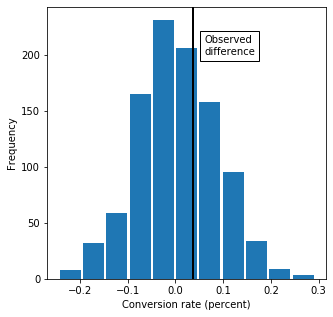

In [36]:
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)
perm_diffs = [100 * perm_fun(conversion, 23739, 22588)for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

See the histogram of 1,000 resampled results in Figure: as it happens, in this case
the observed difference of 0.0368% is well within the range of chance variation.

Simply looking at the graph is not a very precise way to measure statistical significance,
so of more interest is the **p-value. Questa è la frequenza con cui il modello
produce un risultato più estremo di quello osservato**.

We can estimate a pvalue
from our permutation test by taking the proportion of times that the permutation
test produces a difference equal to or greater than the observed difference:

In [37]:
np.mean([diff > obs_pct_diff for diff in perm_diffs])

0.333

The p-value is 0.342, which means that we would expect to achieve a result as
extreme as this, or a more extreme result, by random chance over 30% of the time.

**Alpha**

Gli statistici non vedono di buon occhio la pratica di lasciare alla discrezione del ricercatore il compito di determinare
se un risultato è "troppo insolito" per essere frutto del caso. Piuttosto, viene specificata una soglia
specificata in anticipo, come "più estremo del 5% dei risultati casuali (ipotesi nulla)"; questa soglia è nota come alfa. I livelli tipici di alfa sono il 5% e l'1%. Qualsiasi
livello scelto è una decisione arbitraria: non c'è nulla nel processo che garantisca decisioni corrette l'x% delle volte. Questo perché la domanda sulla probabilità a cui si sta rispondendo non è "Qual è la probabilità che questo accada per caso?", ma piuttosto "Dato un modello di casualità, qual è la probabilità di un risultato così estremo?". Noi
deduciamo quindi un giudizio a ritroso sull'adeguatezza del modello di casualità, ma quel giudizio
non porta con sé una probabilità.

**Practical significance**

The real problem is that people want more meaning from the p-value than it contains.
Here’s what we would like the p-value to convey:
- The probability that the result is due to chance.

We hope for a low value, so we can conclude that we’ve proved something. This is
how many journal editors were interpreting the p-value. But here’s what the p-value
actually represents:

- The probability that, given a chance model, results as extreme as the observed results
could occur.

The difference is subtle but real. A significant p-value does not carry you quite as far
along the road to “proof ” as it seems to promise. The logical foundation for the conclusion
“statistically significant” is somewhat weaker when the real meaning of the pvalue
is understood.

Even if a result is statistically significant, that does not mean it has practical significance.
A small difference that has no practical meaning can be statistically significant
if it arose from large enough samples. Large samples ensure that small, nonmeaningful
effects can nonetheless be big enough to rule out chance as an explanation.
Ruling out chance does not magically render important a result that is, in its
essence, unimportant.

**Type 1 and Type 2 Errors**

In assessing statistical significance, two types of error are possible:
- A Type 1 error, in which you mistakenly conclude an effect is real, when it is
really just due to chance
- A Type 2 error, in which you mistakenly conclude that an effect is not real (i.e.,
due to chance), when it actually is real

Actually, a Type 2 error is not so much an error as a judgment that the sample size is
too small to detect the effect. When a p-value falls short of statistical significance
(e.g., it exceeds 5%), what we are really saying is “effect not proven.” It could be that a
larger sample would yield a smaller p-value.
The basic function of significance tests (also called hypothesis tests) is to protect
against being fooled by random chance; thus they are typically structured to minimize
Type 1 errors.

### **Punti importanti**

- Significance tests are used to determine whether an observed effect is within the
range of chance variation for a null hypothesis model.
- The p-value is the probability that results as extreme as the observed results
might occur, given a null hypothesis model.
- The alpha value is the threshold of “unusualness” in a null hypothesis chance
model.
- Significance testing has been much more relevant for formal reporting of
research than for data science (but has been fading recently, even for the former).

---
---
 # **Tipi di test**

Normality Tests
- Shapiro-Wilk Test
- D’Agostino’s K^2 Test
- Anderson-Darling Test

Correlation Tests
- Pearson’s Correlation Coefficient
- Spearman’s Rank Correlation
- Kendall’s Rank Correlation
- Chi-Squared Test

Stationary Tests

- Augmented Dickey-Fuller
- Kwiatkowski-Phillips-Schmidt-Shin

Parametric Statistical Hypothesis Tests **(distribuzione normale)**
- Student’s t-test
- Paired Student’s t-test
- Analysis of Variance Test (ANOVA)
- Repeated Measures ANOVA Test

Nonparametric Statistical Hypothesis Tests **(distribuzione non normale)**
- Mann-Whitney U Test
- Wilcoxon Signed-Rank Test
- Kruskal-Wallis H Test
- Friedman Test

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/